# 最大似然估计

最大似然估计是一种用来**估计**模型参数的方法，通过观察给定的数据来估计模型参数
- 采取的准则是：计算出的参数值带入模型(??)后，能够使已知样本（训练集）出现的概率最大。
- 假设：样本数据是独立分布的

基本步骤：
1. 定义似然函数
2. 对似然函数取对数，将连积公式转换成累加
3. 即对各参数求偏导
4. 判断求偏导后的方程组是否有解。若有解，则其解即为所求的最大似然估计值;若无解，则取边界值

- 概率：已知模型和参数，求数据
- 统计：已知数据，求模型和参数

对于表达式 $p(x|\theta)$ 的理解，$x$ 是数据，$\theta$ 是模型的参数：
- 如果 $\theta$ 确定，$x$ 为变量，这时候叫做**概率函数**(probability function)，它描述对于不同的样本点 $x$，其出现的概率是多少。
- 如果 $x$ 确定，$\theta$ 为变量这个函数就叫做**似然函数**(likelihood function)，它描述不同的模型参数，出现 $x$ 这个样本点的概率是多少。


# 直观的理解

# 以符合高斯分布的数据为示例
假设有如下一组数据：

![img1](https://cdn-images-1.medium.com/max/800/1*Z3JJGvEtOjmpLFvmWiUR3Q.png)

首先要诀定用哪个模型来描述数据，这一步重要，否则根本不知道要求哪些参数，
这里假定这些数据符合 Gaussian 分布。高斯分布有两个参数，均值 $u$ 和标准差 $\theta$，
上面假设的数据应该是符合蓝色的曲线：

![img2](https://cdn-images-1.medium.com/max/800/1*uLKl0Nz1vFg6bmfiqpCKZQ.png)

**最大似然估计**的作用就是求出均值 $u$ 和标准差 $\theta$，计算出的值称为 $u$ 和 $\theta$ 的最大估计值（maximum likelihood estimates）。

为了求解参数的最大估计值，需要求出数据的联合概率密度，如果样本之间是相关的，这个值很难求（？？），所以最大似然估计有个前提条件：**各个样本是独立分布的**，在这个条件下，数据的总概率密度可以表示为各个样本的概率密度之积。

高斯函数的概率密度函数为：$P(x;u,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(x-u)^2}{2\sigma^2})$，
分号表示 $u$ 和 $\sigma$ 是我们要求的变量。

假设我们的数据只有三个值 $9, 9.5, 11$，则这组数据的总概率密度可以写为：

![img3](https://cdn-images-1.medium.com/max/800/1*rFzbQ614IR4zEwBM3k1V0Q.png)

上述式子取到最大值时 $u$ 和 $\sigma$ 的值即为我们要求的最大似然估计值。

为了简化求导计算，一般都是对原始的式子求自然对数（natural logarithm）。自然对数是单调递增的，
所以自然对数的最大值对应的点一定能再映射到原始式子上。然后上面的式子可以写成：

![img4](https://cdn-images-1.medium.com/max/1600/1*iEdEaqWWiruaw_Fr2ophxw.png)

进一步简化：

![img5](https://cdn-images-1.medium.com/max/1600/1*xjDrGJ_JHLMa7619jFkjLA.png)

对 $u$ 求偏导，并使表达式等于 0，即可求出 $u$ 的最大似然估计值，同理可以算出 $\theta$：

![img6](https://cdn-images-1.medium.com/max/1600/1*kdjQQo5jUX9a2Z0kblJ4Hg.png)
![img7](https://cdn-images-1.medium.com/max/1600/1*rHtqdjFXRw4sdnLU9n_WsQ.png)




# 使用最大似然估计进行线性回归

线性回归可以用如下的方程表示：
\begin{eqnarray}
y ({\bf x}) = \beta^T {\bf x} + \epsilon = \sum_{j=0}^p \beta_j x_j + \epsilon
\end{eqnarray}

其中 $\beta^T$ 和 $\bf x$ 都是 $p+1$ 维的向量 $\beta^T, {\bf x} \in \mathbb{R}^{p+1}$，$\beta^T = (\beta_0, \beta_1, \ldots, \beta_p)$，${\bf x} = (1, x_1, \ldots, x_p)$，直线里面的截距相当于 $\beta_0$，这种写法是符号上的简化写法。$\epsilon$ 符合正太分布 $\epsilon \sim \mathcal{N}(\mu, \sigma^2)$，代表误差。

把线性回归看成是条件概率(conditional probability density，PCD)模型 $p(y|\bf x, \theta)$，

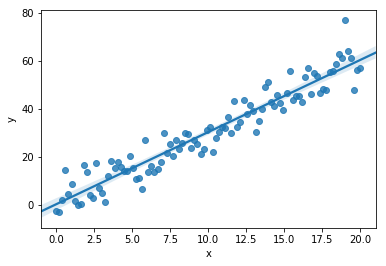

In [16]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

# generate adta
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

# plot
sns.regplot(df.x, df.y)

# split features and target
X = df[['constant', 'x']]

In [23]:
# use ordinary least squares to fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1019.
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.38e-53
Time:                        14:01:00   Log-Likelihood:                -311.09
No. Observations:                 100   AIC:                             626.2
Df Residuals:                      98   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.3716      1.089      0.341      0.734      -1.789       2.533
x              3.0028      0.094     31.923      0.000       2.816       3.190
==============================================================================
Omnibus:                        7.678   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.219
Skew:                           0.591   Prob(JB):                       0.0271
Kurtosis:                       3.579   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# define likelihood function
def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions
    # next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
    # return negative LL
    return(negLL)

guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method='Nelder-Mead', options={'disp': True})
results

Optimization terminated successfully.
         Current function value: 311.092537
         Iterations: 129
         Function evaluations: 220


 final_simplex: (array([[0.37163639, 3.00284019, 5.4302421 ],
       [0.37158055, 3.00284333, 5.43027884],
       [0.37157031, 3.00284333, 5.43023576],
       [0.37161021, 3.00284554, 5.43024114]]), array([311.09253747, 311.09253747, 311.09253747, 311.09253747]))
           fun: 311.0925374687162
       message: 'Optimization terminated successfully.'
          nfev: 220
           nit: 129
        status: 0
       success: True
             x: array([0.37163639, 3.00284019, 5.4302421 ])

In [22]:
resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']   
np.round(resultsdf.head(2), 4)

,coef
constant,0.3716
x,3.0028


参考：
- https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
- https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f
- http://suriyadeepan.github.io/2017-01-22-mle-linear-regression/
- https://blog.csdn.net/zengxiantao1994/article/details/72787849
- https://www.quantstart.com/articles/Maximum-Likelihood-Estimation-for-Linear-Regression
- https://zhuanlan.zhihu.com/p/26614750
- https://blog.csdn.net/u011508640/article/details/72815981